<a href="https://colab.research.google.com/github/17092003vamsi/213ECE3317/blob/main/wednesday%20complete%20work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd

file_path = '/content/COMPLETE DATA SET 2 (1).csv'
data = pd.read_csv(file_path)

# Inspect the first few rows of the dataset
print(data.head())

# Check the data types and see if there are any missing values
print(data.info())

print(f"Data shape: {X.shape}")
print(f"Labels shape: {y.shape}")



           0          1          2          3          4          5  \
0  38.274353  38.274353  38.274353  38.274353  38.274353  38.274353   
1  60.743327  58.374448  52.307200  43.167179  37.306176  39.377123   
2  35.598535  30.805204  25.624235  21.627399  19.019032  18.516897   
3  25.595452  23.208748  22.575827  22.156338  20.145037  15.588119   
4  38.042662  42.871367  42.081415  35.981881  28.191039  18.636240   

           6          7          8          9  ...      2082      2083  \
0  38.274353  38.274353  38.274353  38.274353  ...  0.000068  0.000044   
1  33.675893  23.270452  26.359007  29.186764  ...  0.000149  0.000099   
2  16.391426  14.156888  16.742159  18.522038  ...  0.000105  0.000079   
3  12.127479  11.763777  12.586168  11.047582  ...  0.000061  0.000039   
4  13.543053  13.268878  13.004368  16.247301  ...  0.000162  0.000124   

       2084      2085      2086      2087      2088      2089  Type  Label  
0  0.000020 -0.000005 -0.000029 -0.000053 -0.000077

In [16]:
print(data.dtypes)

print(data.isnull().sum())

0               float64
1               float64
2               float64
3               float64
4               float64
                 ...   
Type_(COOH)2       bool
Type_COOH          bool
Type_NH2           bool
Label_HF           bool
Label_ZAM          bool
Length: 2095, dtype: object
0               0
1               0
2               0
3               0
4               0
               ..
Type_(COOH)2    0
Type_COOH       0
Type_NH2        0
Label_HF        0
Label_ZAM       0
Length: 2095, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming the last column is the label and the others are features
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Labels

# Encode labels (if they are categorical)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Reshape X if necessary (e.g., to 2D or 3D for CNN input)
# Assuming each sample is a signal that needs to be reshaped for CNN
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Training data shape:", y_train.shape)
print("Test data shape:", y_test.shape)

Training data shape: (245, 2091, 1)
Test data shape: (62, 2091, 1)
Training data shape: (245,)
Test data shape: (62,)


In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build the CNN model
model = models.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(128, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Loss function for binary classification
              metrics=['accuracy'])

# Print model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 2089, 32)            │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1044, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 1042, 64)            │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 521, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 519, 128)            │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 259, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 33152)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,243,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,274,753 (16.31 MB)

 Trainable params: 4,274,753 (16.31 MB)

 Non-trainable params: 0 (0.00 B)

In [2]:
import numpy as np

# Separate features (X) and labels (y)
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Labels

# Identify and convert non-numeric columns to numeric
non_numeric_cols = data.select_dtypes(exclude=['number']).columns
print(f"Non-numeric columns: {non_numeric_cols}")

# Apply one-hot encoding to non-numeric columns
data = pd.get_dummies(data, columns=non_numeric_cols)

# Update features and labels after encoding
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


Non-numeric columns: Index(['Type', 'Label'], dtype='object')


In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np # Added import statement for NumPy
from scipy.fft import fft

file_path = '/content/COMPLETE DATA SET 2 (1).csv'
data = pd.read_csv(file_path)

# Assuming the last column is the label and the others are features
X = data.iloc[:, :-1]  # Features - Keep as a DataFrame for easier manipulation
y = data.iloc[:, -1].values   # Labels

# Encode the labels if they are categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

# Convert non-numeric columns to numeric using one-hot encoding
X = pd.get_dummies(X, columns=non_numeric_cols)

# Convert to numpy array for FFT
X = X.values

# Apply FFT to each signal in the feature matrix
X_fft = np.abs(np.array([fft(signal) for signal in X]))

# Reshape the feature matrix for input into the CNN
X_fft = X_fft.reshape((X_fft.shape[0], X_fft.shape[1], 1))

from sklearn.model_selection import train_test_split

# Split data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_fft, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Define the CNN model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the CNN model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the CNN model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.4771 - loss: 287.9558 - val_accuracy: 0.5161 - val_loss: 101.4001
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.4476 - loss: 58.2380 - val_accuracy: 0.5161 - val_loss: 28.7305
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5925 - loss: 13.6176 - val_accuracy: 0.6935 - val_loss: 4.7971
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7756 - loss: 2.5828 - val_accuracy: 0.6452 - val_loss: 6.8237
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8097 - loss: 2.7697 - val_accuracy: 0.9032 - val_loss: 0.9995
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9208 - loss: 1.0307 - val_accuracy: 0.8871 - val_loss: 3.2849
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9541 - loss: 0.4919 - val_accuracy: 0.9355 - val_loss: 0.3057
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9404 - loss: 0.3673 - val_accuracy: 0.9355 - val_loss:

In [10]:
# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9147 - loss: 0.4097
Test Accuracy: 90.32%


In [11]:
from sklearn.metrics import confusion_matrix

# Predict the labels for the test set
y_pred = (model.predict(X_test) > 0.5).astype("int64")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


In [12]:
# Extract values from the confusion matrix
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]

# Print the confusion matrix components
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")


True Positives (TP): 30
False Positives (FP): 6
True Negatives (TN): 26
False Negatives (FN): 0


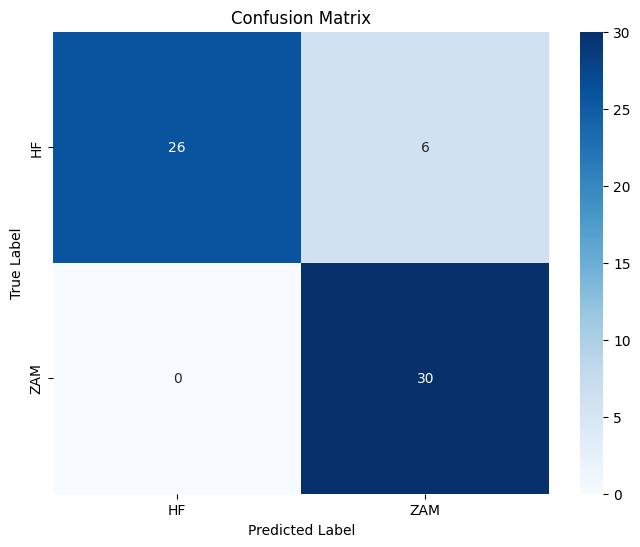

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["HF", "ZAM"], yticklabels=["HF", "ZAM"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


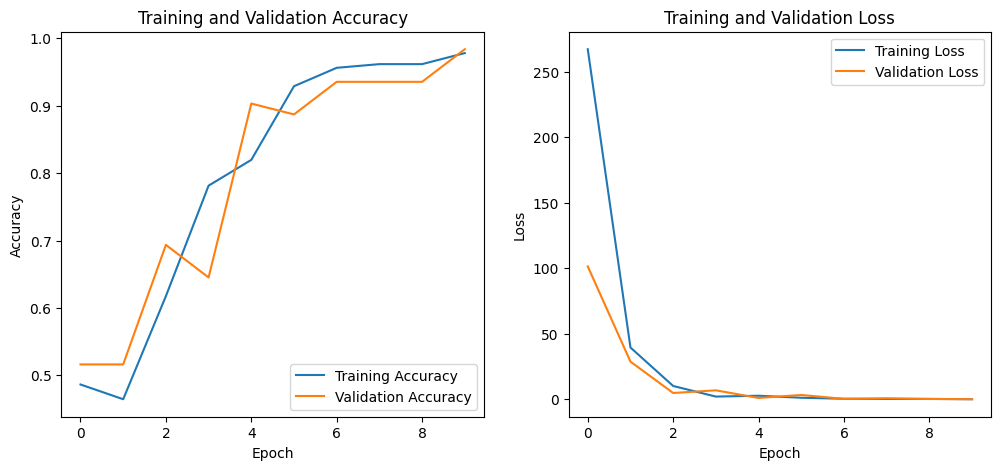

In [14]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [15]:
# Predict on a new signal from the validation set
new_signal = X_val[0].reshape(1, -1, 1)
prediction = model.predict(new_signal)
predicted_class = "HF (Normal Skin Fibroblasts)" if prediction < 0.5 else "ZAM (Tumor Associated Fibroblasts)"
print(f"Predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Predicted class: HF (Normal Skin Fibroblasts)
